<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Иван!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект. Прощу прощения за долгое ожидание
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> Привет!
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

Заказчик этого исследования — сеть отелей «Как в гостях».
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

## Знакомство с данными

### Импортируем необходимые библиотеки и методы

In [1]:
# импортируем библиотеки и методы
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

Зафиксируем random_state:

In [2]:
np.random.seed(274)
RANDOM_STATE = 1001
BUDGET = 400000
DEPOSIT = 0.8

И отключим предупреждения:

In [3]:
import warnings

warnings.filterwarnings('ignore')

И немного магии для удобства просмотра таблиц:

In [4]:
pd.options.display.max_columns = 100 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### Прочитаем данные 

In [5]:
# откроем датасет либо локально, либо из интернета
try:
    df_train = pd.read_csv('/datasets/hotel_train.csv')
    df_test = pd.read_csv('/datasets/hotel_test.csv')
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_train.csv')
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_test.csv')

Познакомимся с обучающими данными:

In [6]:
display(df_train.head())
display(df_train.describe())
df_train.info()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

После первого знакомства с обучающими данными, можно заметить, что информация в датасэте представлена за два года (2015, 2016). Так же есть ошибки в столбце `babies`, явные выбросы в столбцах `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes` и `days_in_waiting_list`.

Познакомимся с тестовыми данными:

In [7]:
display(df_test.head())
display(df_test.describe())
df_test.info()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

Предварительное знакомство с тестовыми данными показало, что информация в датасэте представлена за только за 2017 год. Есть  ошибки в столбце `required_car_parking_spaces`, явные выбросы в столбцах `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes` и `days_in_waiting_list`.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте!</div>

## Предобработка и исследовательский анализ данных

Для удобства работы с двумя датасетами следует их объеденить, а после предобработки мы разделим их. Мерилом выступит столбец `arrival_date_year`, потому что мы знаеам, что в df_test только 2017 год.

In [8]:
df_full = pd.concat([df_train, df_test])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97641 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97641 non-null  int64  
 1   is_canceled                     97641 non-null  int64  
 2   lead_time                       97641 non-null  float64
 3   arrival_date_year               97641 non-null  int64  
 4   arrival_date_month              97641 non-null  object 
 5   arrival_date_week_number        97641 non-null  int64  
 6   arrival_date_day_of_month       97641 non-null  int64  
 7   stays_in_weekend_nights         97641 non-null  int64  
 8   stays_in_week_nights            97641 non-null  int64  
 9   adults                          97641 non-null  float64
 10  children                        97641 non-null  float64
 11  babies                          97641 non-null  float64
 12  meal                            

### Проверим данные и откорректируем их


Сначала мы удалим столбец `id`, так как он не несет в себе никакой полезной информации:

In [9]:
df_full = df_full.drop('id', axis=1)

Далее пойдем по порядку: столбец `is_canceled` - целевой. Он содержит только значения *0* и *1*. Остальные стобцы будем анализировать с учетом столбца `is_canceled`.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, id нам точно не понадобится</div>

#### lead_time

In [10]:
# для удобства поменяем значения на int
df_full['lead_time'] = df_full['lead_time'].astype('int64')

In [11]:
print(sorted(df_full['lead_time'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [12]:
# посмотрм сколько людей бронируют более чем на год
df_full['lead_time'][df_full['lead_time']>365].count()

151

Аномалий нет,  можно отметить что люди бронируют отель более чем на год вперед, но таких совсем мало.

#### arrival_date_year

In [13]:
df_full['arrival_date_year'].unique()

array([2015, 2016, 2017])

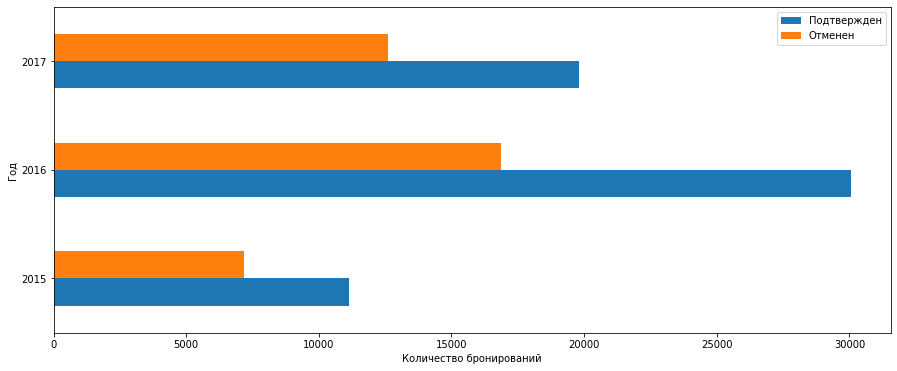

In [14]:
# построим график 
pd.crosstab(df_full['arrival_date_year'], df_full['is_canceled']).plot.barh(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.ylabel('Год')
plt.xlabel('Количество бронирований')

plt.show()

Ничего примечательного не замечено. Оставляем столбец как есть, тем более он нам нужен только для того, чтобы разделить в будущем датасэт на тестовый и обучающий.

#### arrival_date_month (arrival_date_season)            

In [15]:
df_full['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

Так как по условию задачи в ценовой политике отеля используются сезонные коэффициенты, можно смело поменять месяцы на сезон.

In [16]:
df_full['arrival_date_month'] = df_full['arrival_date_month'].replace(['December','January', 'February'],'winter')
df_full['arrival_date_month'] = df_full['arrival_date_month'].replace(['March', 'April', 'May'],'spring')
df_full['arrival_date_month'] = df_full['arrival_date_month'].replace(['June','July', 'August'],'summer')
df_full['arrival_date_month'] = df_full['arrival_date_month'].replace(['September', 'October', 'November'],'autumn')

In [17]:
# а чтобы не путаться в дальнейшем, переименуем столбец в 'arrival_date_season'
df_full.rename(columns={'arrival_date_month': 'arrival_date_season'}, inplace=True)

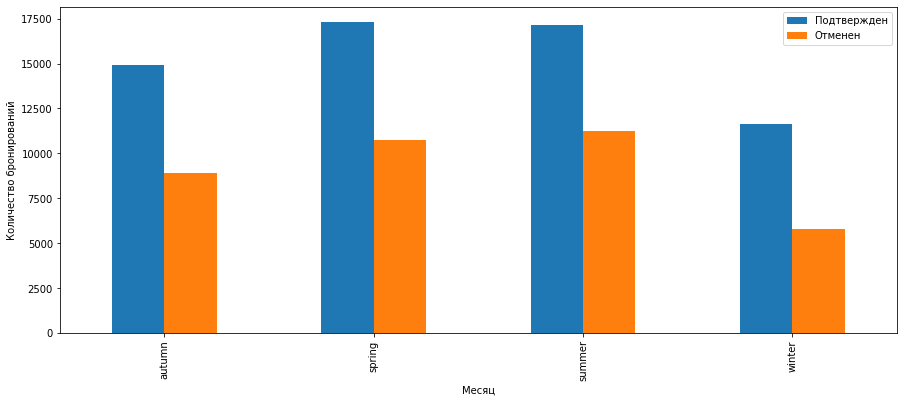

In [18]:
# построим график 
pd.crosstab(df_full['arrival_date_season'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Месяц')
plt.ylabel('Количество бронирований')

plt.show()

Выглядит давольно неплохо. Бронирований в зимние месяцы незначиельно меньше, все-таки люди предпочитают отдыхать в теплое время года.

#### arrival_date_week_number

In [19]:
df_full['arrival_date_week_number'].describe()

count    97641.000000
mean        26.846581
std         13.772847
min          1.000000
25%         16.000000
50%         27.000000
75%         38.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

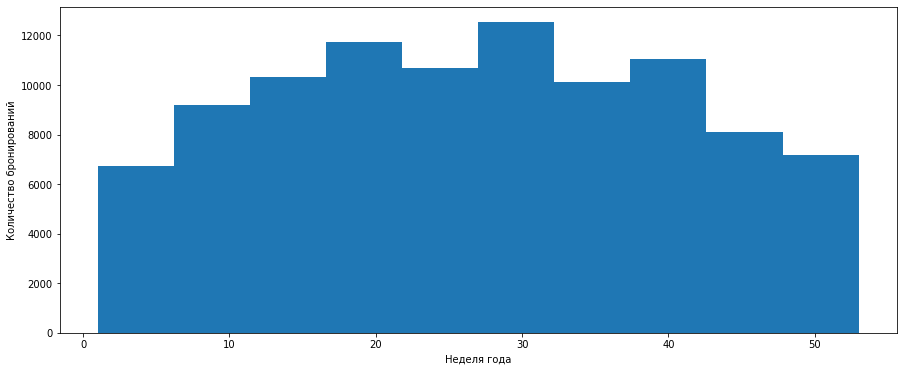

In [20]:
df_full['arrival_date_week_number'].hist(grid=False,figsize=(15, 6))

plt.xlabel('Неделя года')
plt.ylabel('Количество бронирований')

plt.show()

Можно заметить распределение Гаусса - в добавок отлично коррелирует с данными по сезонам Зимние месяцы броней меньше чем в осальные сзоны. 

В целом данный столбец нам не помошник в нашем анализе, его можно удалить:

In [21]:
df_full = df_full.drop('arrival_date_week_number', axis=1)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, номер недели всегда будет линейно зависим с номером месяца, а значит новой информации он не несет</div>

#### arrival_date_day_of_month      

In [22]:
df_full['arrival_date_day_of_month'].describe()

count    97641.000000
mean        15.784455
std          8.754660
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

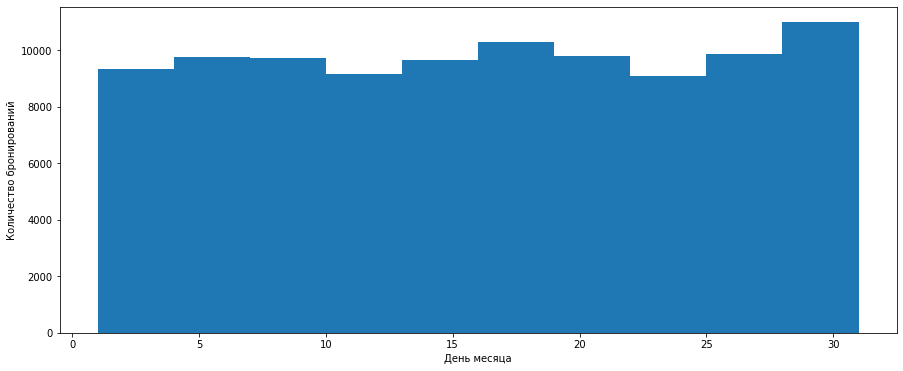

In [23]:
df_full['arrival_date_day_of_month'].hist(grid=False,figsize=(15, 6))

plt.xlabel('День месяца')
plt.ylabel('Количество бронирований')

plt.show()

Гистограмма - ровнее не придумаешь, разве что самую капельку задран хвост. 

Судьба у данного столбца такая же как и у `arrival_date_week_number`, его можно удалить:

In [24]:
df_full = df_full.drop('arrival_date_day_of_month', axis=1)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

#### stays_in_weekend_nights и stays_in_week_nights

In [25]:
df_full['stays_in_weekend_nights'].describe()

count    97641.000000
mean         0.839361
std          0.853682
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: stays_in_weekend_nights, dtype: float64

In [26]:
df_full['stays_in_week_nights'].describe()

count    97641.000000
mean         2.263066
std          1.362798
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: stays_in_week_nights, dtype: float64

Оба столбца мне категорически не нравятся, не понимаю как могут быть 4 выходных или 6 будичных ночей. Единственное объяснение этому - столбцы пересекаются, например бронь с пятницы и до понедельника следующей недели. В таком случае действительно получится 4 выходных и 6 будничных ночи, тогда не понятно для чего нам столбец `total_nights`. 

Проверим следующим образом: выходная ночь + будничная ночь = всего ночей. Если условие соблюдено, то эти два столбца нам не нужны и их можно удалить.

In [27]:
((df_full['stays_in_weekend_nights'] + df_full['stays_in_week_nights']) ==
                                       df_full['total_nights']).unique()

array([ True])

Вот и подтвердилась бесполезная пара столбцов, под нож их!

In [28]:
df_full = df_full.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis=1)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, так как цены в отеле не меняются в зависимости от дня недели, то эти столбцы спокойно можно удалять</div>

#### adults

In [29]:
# для удобства поменяем значения на int
df_full['adults'] = df_full['adults'].astype('int64')

In [30]:
df_full['adults'].unique()

array([1, 2, 3, 4, 0])

Смущает количество взрослых равное нулю. Дети баловались?

Думаю не будет ошибкой удалить строки где взрослых нет.

In [31]:
# посмотрим сколько у нас таких записей
(df_full['adults'] == 0).sum()

235

In [32]:
# удаляем строки с без взрослых
df_full = df_full.loc[df_full['adults'] != 0]

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, детям без взрослых сдать номер не могут, поэтому такие записи — это явные аномалии</div>

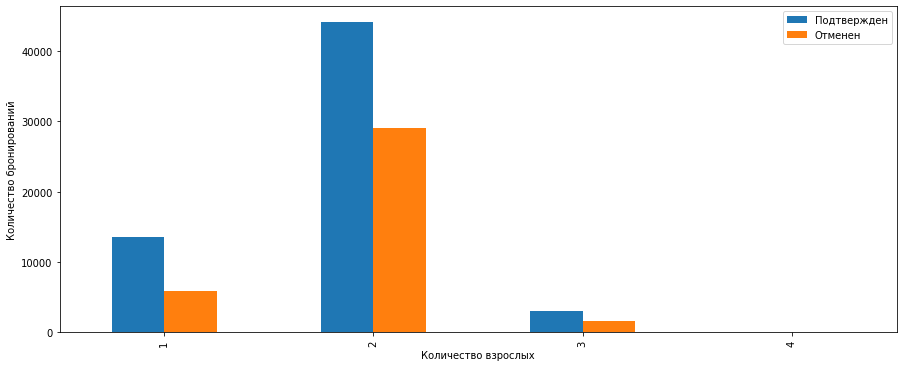

In [33]:
# построим график 
pd.crosstab(df_full['adults'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Количество взрослых')
plt.ylabel('Количество бронирований')

plt.show()

Хоть у нас и совсем мало с трок с 4 взрослыми, но они никак не мешают нам работать, оставим их.

#### children

In [34]:
# для удобства поменяем значения на int
df_full['children'] = df_full['children'].astype('int64')

In [35]:
df_full['children'].unique()

array([0, 1, 2, 3])

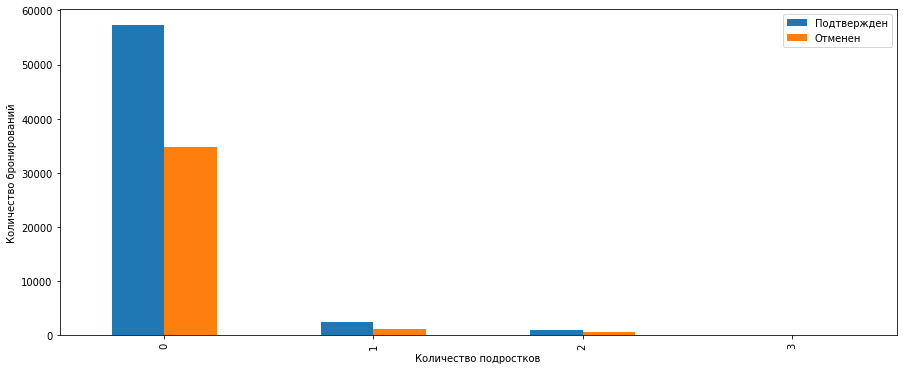

In [36]:
# построим график 
pd.crosstab(df_full['children'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Количество подростков')
plt.ylabel('Количество бронирований')

plt.show()

Все выглядит в рамках приличия, оставим столбец.

#### babies

In [37]:
# для удобства поменяем значения на int
df_full['babies'] = df_full['babies'].astype('int64')

In [38]:
df_full['babies'].describe()

count    97406.000000
mean         0.006653
std          0.091735
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64

In [39]:
# посмотрим сколько у нас таких записей
(df_full['babies'] > 8).sum()

2

По одному на 9 и 10 детей. Вожатая с группой детсадовцев? Почему бы и нет, но номеров с 10 кроватками я не встречал. 

Двумя строками можно пожертвовать.

In [40]:
# удаляем строки
df_full = df_full.loc[df_full['babies'] < 9]

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но если внимательно изучить признак, то можно заметить, что бронирований с 2 младенцами тоже слишком мало, чтобы делать по ним прогноз. Такие записи тоже лучше удалить(или приравнять к 1) и переименовать признак, например, в `has_babies`, чтобы обозначить его теперь уже бинарную природу

<div class="alert alert-info">
<b>Комментарий студента:</b> Довольно долго думал касательно всех подобных столбцов и пришел к следующиему выводу:
    1. эспоненциальное распределение имеет место быть, пускай и угол атаки на графике будет под 90 градусов;
    2. незначительное количество строк - оно в обе стороны незначительно (что оставить, что удалить);
    3. самое главное - в случае уточненных датафреймов (мы знаем, что дф_тест хоть и за 2017 год, но только за 8 месяцев) модель будет знать что такое и 2 и теоретически 3 ребенка.
    
Стараюсь придерживаться средующего правила в предобработке: оставь-исправь-удали (๑˘︶˘๑)

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: вообще обычно еще стоит ориентироваться на природу выбросов. Например, когда выбросы вполне легко объясняются предметной областью: в нашем датасете можно заметить, что люди бронируют номер за год и более. Несмотря на то, что это статистические выбросы, это тоже объясняет поведение определенной группы пользователей, а значит может быть полезно и для модели: постояльцы вполне могут планировать отпуск и за год, особенно, во время акционных предложений. Если же выбросы единичны(как в случае с младенцами) или противоречат здравому смыслу(детям до 14 лет без взрослых не могут сдать номер по закону), то полезными для модели эти данные вряд ли назовешь, скорее, они будут вносить лишний шум. Но проконсультироваться с коллегами по этому поводу и выяснить причину выбросов, конечно, стоит :)</div>

#### meal

In [41]:
df_full['meal'].unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
      dtype=object)

Хвосты из пробелов следует подправить.

In [42]:
df_full['meal'] = df_full['meal'].str.strip()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что заметил лишние пробелы!</div>

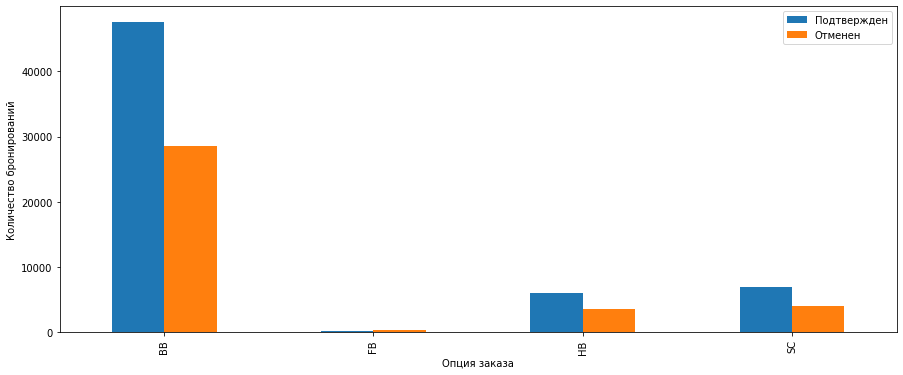

In [43]:
# построим график 
pd.crosstab(df_full['meal'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Опция заказа')
plt.ylabel('Количество бронирований')

plt.show()

Теперь все стало на свои места.

#### country

In [44]:
df_full['country'].unique()

array(['GBR', 'PRT', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'USA', 'DEU',
       'BEL', 'CHE', 'CN', 'GRC', 'NLD', 'ARG', 'RUS', 'SWE', 'POL',
       'EST', 'CZE', 'ITA', 'FIN', 'DNK', 'MOZ', 'BWA', 'LUX', 'BRA',
       'SVN', 'ALB', 'CHN', 'MEX', 'MAR', 'SMR', 'LVA', 'CHL', 'AUT',
       'LTU', 'TUR', 'ISR', 'IND', 'CYM', 'AUS', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'TUN', 'ARE', 'HRV', 'HKG', 'IRN', 'GIB',
       'JEY', 'URY', 'ZAF', 'COL', 'GGY', 'KWT', 'CYP', 'KAZ', 'THA',
       'DOM', 'NGA', 'BLR', 'VEN', 'UKR', 'ARM', 'JPN', 'LKA', 'MYS',
       'BIH', 'MUS', 'OMN', 'SUR', 'JAM', 'BGR', 'CIV', 'SRB', 'JOR',
       'SYR', 'PHL', 'PRI', 'SGP', 'BDI', 'LBN', 'AGO', 'VNM', 'AZE',
       'PLW', 'NZL', 'EGY', 'MDV', 'CMR', 'MLT', 'SVK', 'MWI', 'STP',
       'TWN', 'IDN', 'SEN', 'PER', 'SAU', 'KNA', 'ETH', 'ECU', 'IRQ',
       'AND', 'HND', 'PAK', 'GEO', 'ZMB', 'QAT', 'KHM', 'MCO', 'BGD',
       'ISL', 'UZB', 'IMN', 'TJK', 'NIC', 'BEN', 'MAC', 'VGB', 'TZA',
       'GAB', 'MKD', 

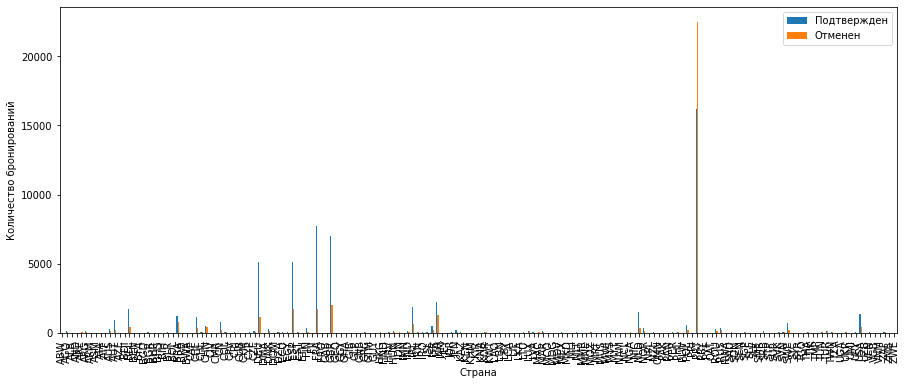

In [45]:
# построим график 
pd.crosstab(df_full['country'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Страна')
plt.ylabel('Количество бронирований')

plt.show()

Ужасно некрасивый график, заменим страны, количество которых меньше процента, на `other`:

In [46]:
# (df_full['country'].value_counts().sum())/100 - тот самый процент от общего числа записей
df_full.loc[df_full['country'].isin((df_full['country'].value_counts())
                [(df_full['country'].value_counts())<
                ((df_full['country'].value_counts().sum())/100)].index), 'country'] = 'other'

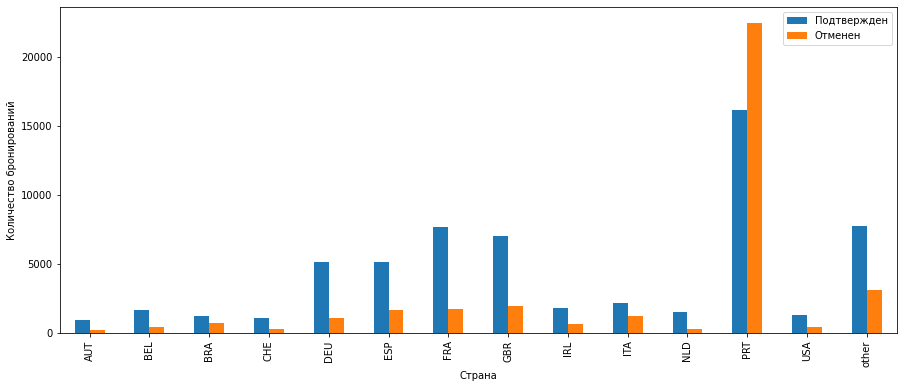

In [47]:
# построим график 
pd.crosstab(df_full['country'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Страна')
plt.ylabel('Количество бронирований')

plt.show()

Ох уж эти португальцы, отмен больше чем приличные люди себе могут позволить! Похоже, что облик "плохого клиента" начал вырисовываться.

#### distribution_channel

In [48]:
df_full['distribution_channel'].unique()

array(['Direct', 'TA/TO', 'Corporate', 'GDS'], dtype=object)

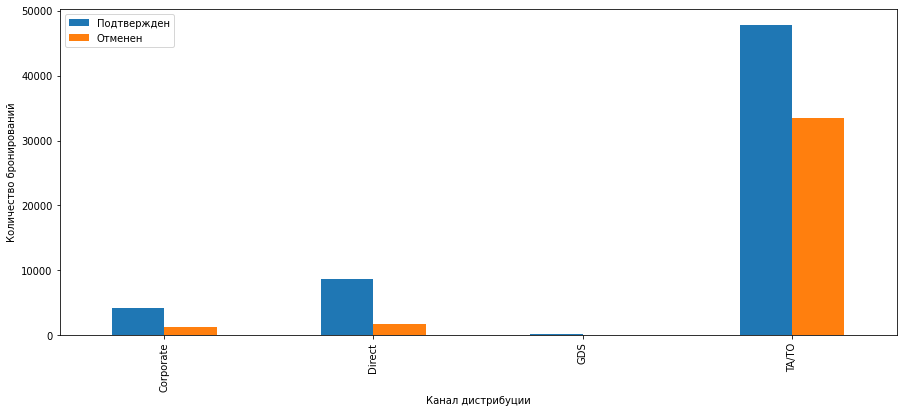

In [49]:
# построим график 
pd.crosstab(df_full['distribution_channel'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Канал дистрибуции')
plt.ylabel('Количество бронирований')

plt.show()

In [50]:
# посмотрим сколько у нас таких записей
(df_full['distribution_channel'] == 'GDS').sum()

184

С этим признаком проблем нет. 

Следует отметить, что `GDS` на порядок (а то и на два) меньше остальных каналов дистрибуции.

#### is_repeated_guest

In [51]:
df_full['is_repeated_guest'].unique()

array([0, 1])

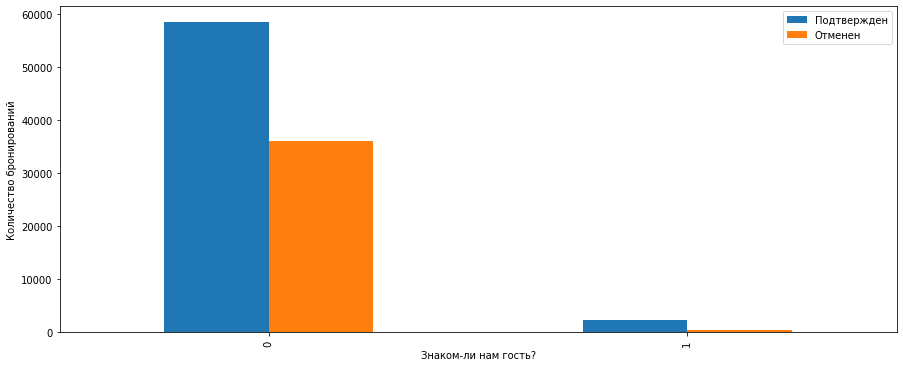

In [52]:
# построим график 
pd.crosstab(df_full['is_repeated_guest'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Знаком-ли нам гость?')
plt.ylabel('Количество бронирований')

plt.show()

Постоянных клиентов не так много как хотелось, а в остальном все выглядит прилично.

#### previous_cancellations

In [53]:
df_full['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14, 24, 19,  4,  5, 21,  6, 13, 11])

In [54]:
# посмотрим сколько у нас записей c отменами > 1
(df_full['previous_cancellations'] > 1).sum()

332

Капля в море. Но что же со странами? Давайте посмотрим на повторные отмены по странам:

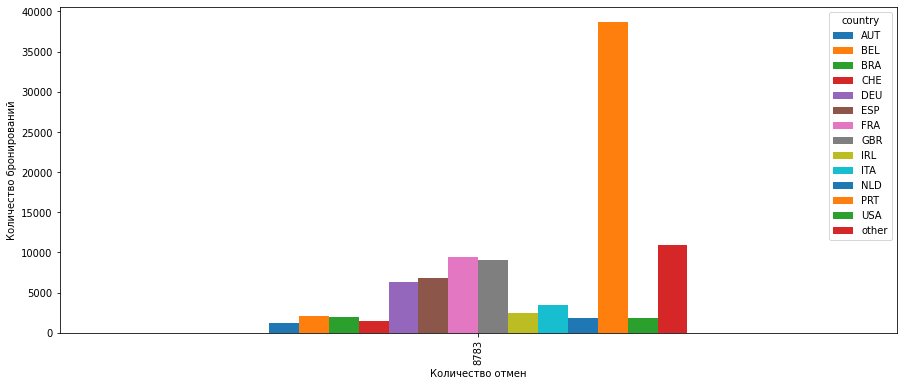

In [55]:
# построим график 
pd.crosstab(df_full['previous_cancellations'].sum(), df_full['country']).plot.bar(figsize=(15, 6))

plt.xlabel('Количество отмен')
plt.ylabel('Количество бронирований')

plt.show()

И снова португалия абсолютный чемпион. Интересно, чем насолил им наш(ваш) отель?

#### previous_bookings_not_canceled

In [56]:
df_full['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6, 10, 12, 13, 15, 21,  7,  9,  8, 11, 14,
       18, 22, 16, 17, 19, 20, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 25, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

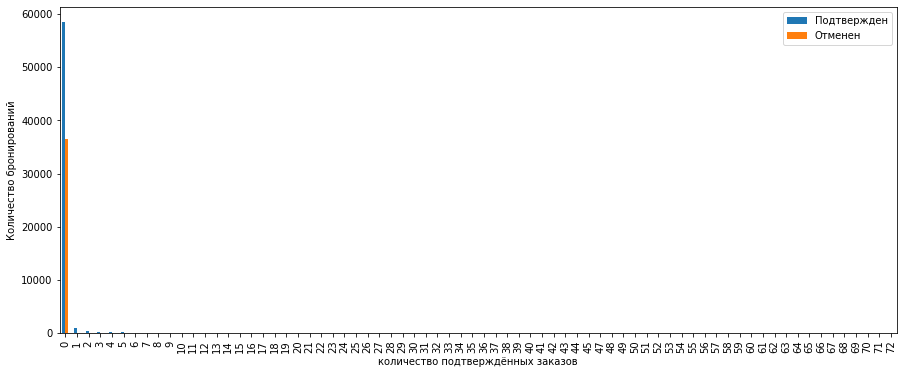

In [57]:
# построим график 
pd.crosstab(df_full['previous_bookings_not_canceled'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('количество подтверждённых заказов')
plt.ylabel('Количество бронирований')

plt.show()

In [58]:
# посмотрим сколько у нас записей > 6
(df_full['previous_bookings_not_canceled'] > 6).sum()

485

Какое то не здоровое количество подтверждений заказов, похоже на анамалию.

In [59]:
# удаляем строки
df_full = df_full.loc[df_full['previous_bookings_not_canceled'] < 6]

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

#### reserved_room_type

In [60]:
df_full['reserved_room_type'].unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

Подчистим пробельные хвосты как в случае с `meal`:

In [61]:
df_full['reserved_room_type'] = df_full['reserved_room_type'].str.strip()

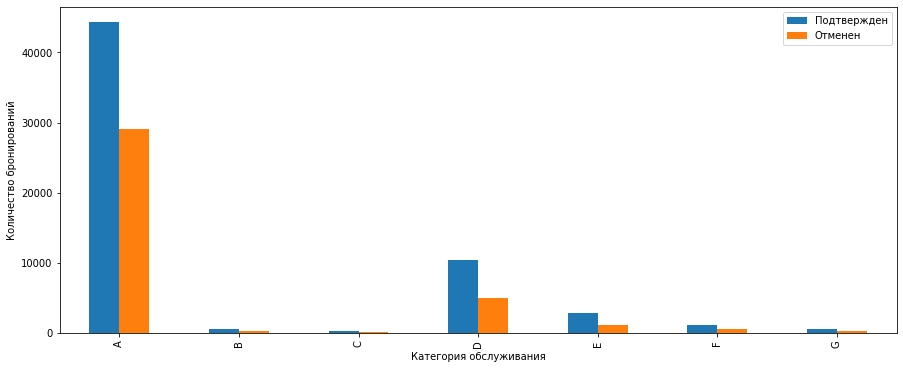

In [62]:
# построим график 
pd.crosstab(df_full['reserved_room_type'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Категория обслуживания')
plt.ylabel('Количество бронирований')

plt.show()

Вроде чисто, по крайней мере ничего подозрительного не наблюдается.

#### booking_changes

In [63]:
print(sorted(df_full['booking_changes'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18]


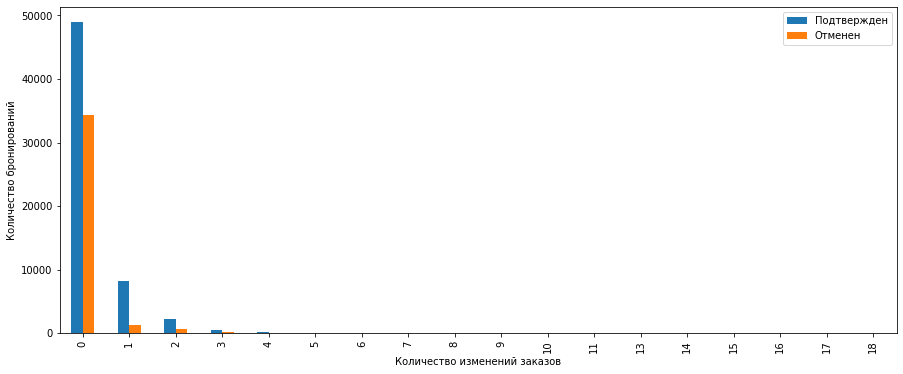

In [64]:
# построим график 
pd.crosstab(df_full['booking_changes'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Количество изменений заказов')
plt.ylabel('Количество бронирований')

plt.show()

Ну пускай 4 раза уточнять заказ, но 18? с этим надо что то делать.

In [65]:
# посмотрим сколько у нас записей > 5
(df_full['booking_changes'] > 5).sum()

88

In [66]:
# удаляем строки
df_full = df_full.loc[df_full['booking_changes'] < 6]

Удалить строки наверно не будет ошибкой. Аномалия в данных на лицо, а 157 строк погоды не сделают.

#### days_in_waiting_list

In [67]:
print(sorted(df_full['days_in_waiting_list'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 87, 89, 91, 93, 96, 98, 99, 100, 101, 105, 107, 108, 109, 111, 113, 117, 120, 121, 122, 125, 142, 147, 150, 154, 160, 162, 165, 167, 174, 175, 176, 178, 183, 185, 187, 193, 207, 215, 223, 224, 236, 259]


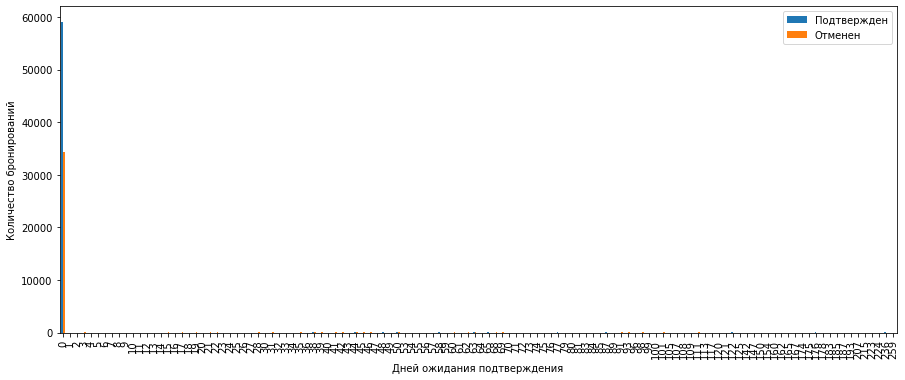

In [68]:
# построим график 
pd.crosstab(df_full['days_in_waiting_list'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Дней ожидания подтверждения')
plt.ylabel('Количество бронирований')

plt.show()

Опять та же ситуация, что и у `previous_bookings_not_canceled` и `booking_changes`. Только в этом случае львиная доля заказов подтверждается день в день.

In [69]:
# посмотрим сколько у нас записей > 5
(df_full['days_in_waiting_list'] > 1).sum()

3385

Что то много строк для удаления, и распределены значения совсем равнехонько. Оставим как есть.

#### customer_type

In [70]:
df_full['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

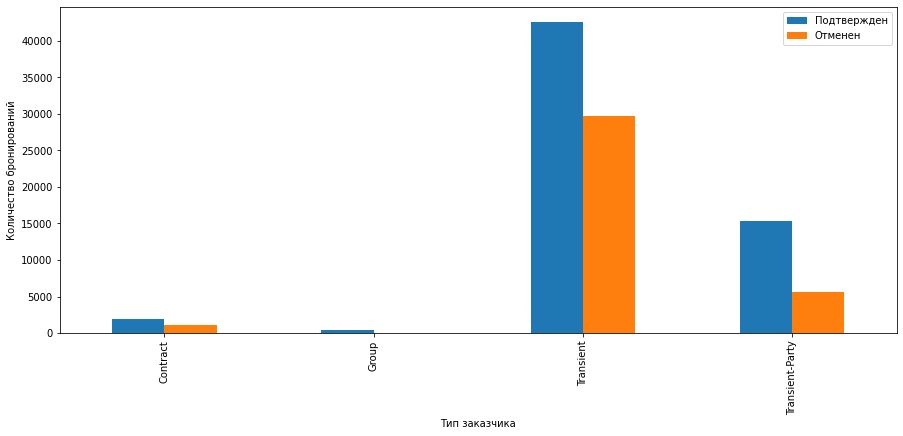

In [71]:
# построим график 
pd.crosstab(df_full['customer_type'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Тип заказчика')
plt.ylabel('Количество бронирований')

plt.show()

Тут все чин по чину.

#### required_car_parking_spaces

In [72]:
df_full['required_car_parking_spaces'].unique()

array([0, 1, 2, 3, 8])

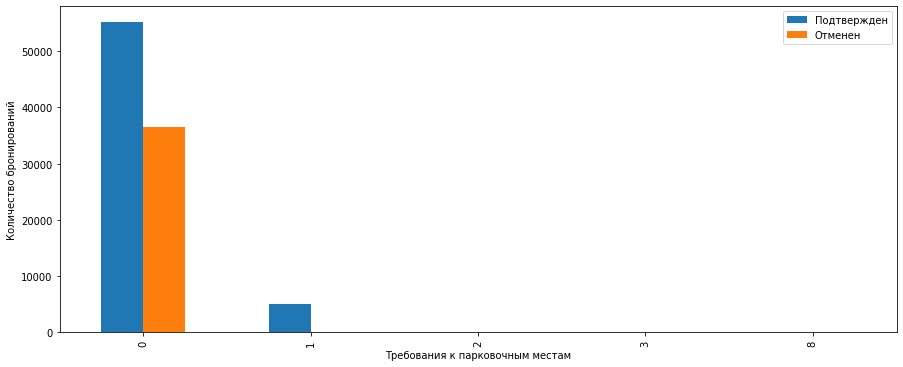

In [73]:
# построим график 
pd.crosstab(df_full['required_car_parking_spaces'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Требования к парковочным местам')
plt.ylabel('Количество бронирований')

plt.show()

8 мест - явно выброс. КАЗНИТЬ!(с)

In [74]:
# посмотрим сколько у нас записей > 3
(df_full['required_car_parking_spaces'] > 3).sum()

2

In [75]:
# удаляем строки
df_full = df_full.loc[df_full['required_car_parking_spaces'] < 4]

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: а этот признак можно обработать, аналогично признаку с количеством младенцев</div>

#### total_of_special_requests

In [76]:
df_full['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

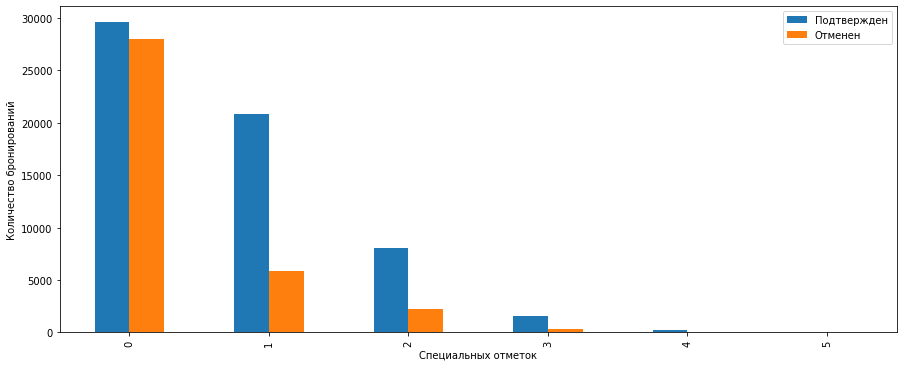

In [77]:
# построим график 
pd.crosstab(df_full['total_of_special_requests'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Специальных отметок')
plt.ylabel('Количество бронирований')

plt.show()

Ой как равненько, глаз радуется. Только вот отмененных заказов почти столько же соклько и подтвержденых (для бронирований без специальных отметок).

#### total_nights

In [78]:
df_full['total_nights'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  8, 10,  9])

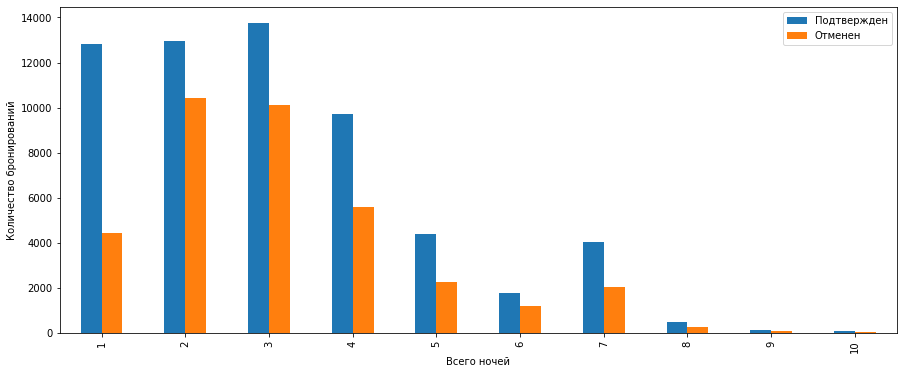

In [79]:
# построим график 
pd.crosstab(df_full['total_nights'], df_full['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Всего ночей')
plt.ylabel('Количество бронирований')

plt.show()

С этим столбцом так же нет никаких пароблем.

#### post scriptum

Вернем все как было:

In [80]:
# разделим обратно данные на обучающую и тестовую выборки
df_train = df_full.loc[df_full['arrival_date_year'] != 2017]
df_test = df_full.loc[df_full['arrival_date_year'] == 2017]

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64694 entries, 0 to 65228
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     64694 non-null  int64 
 1   lead_time                       64694 non-null  int64 
 2   arrival_date_year               64694 non-null  int64 
 3   arrival_date_season             64694 non-null  object
 4   adults                          64694 non-null  int64 
 5   children                        64694 non-null  int64 
 6   babies                          64694 non-null  int64 
 7   meal                            64694 non-null  object
 8   country                         64694 non-null  object
 9   distribution_channel            64694 non-null  object
 10  is_repeated_guest               64694 non-null  int64 
 11  previous_cancellations          64694 non-null  int64 
 12  previous_bookings_not_canceled  64694 non-null

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32041 entries, 0 to 32411
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     32041 non-null  int64 
 1   lead_time                       32041 non-null  int64 
 2   arrival_date_year               32041 non-null  int64 
 3   arrival_date_season             32041 non-null  object
 4   adults                          32041 non-null  int64 
 5   children                        32041 non-null  int64 
 6   babies                          32041 non-null  int64 
 7   meal                            32041 non-null  object
 8   country                         32041 non-null  object
 9   distribution_channel            32041 non-null  object
 10  is_repeated_guest               32041 non-null  int64 
 11  previous_cancellations          32041 non-null  int64 
 12  previous_bookings_not_canceled  32041 non-null

In [83]:
# удалим теперь уже ненужный столбец с годом
df_train = df_train.drop('arrival_date_year', axis=1)
df_test = df_test.drop('arrival_date_year', axis=1)

### Выводы

По результатам предобработки и анализа данных мы избавились от ряда ненужных признаков и удалили незначительное количество строк. Вцелом данные выгляядят неплохо, нам даже удалось определить один из признаков недобросовестных клиентов. Можно переходить к следующему шагу.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: молодец, что подробно изучаешь данные!</div>

## Формулировка ML-задачи на основе бизнес-задачи

### Оценим прибыль отеля до внедрения депозитов

А чтобы не портить df_test, посчитаем все на его копии:

In [84]:
# для подсчета прибыли
df_test_copy = df_test.copy(deep = True)

#### Добавление столбцов со стоимостью номера и стоимостью обслуживания

In [85]:
# стоимость номера
df_test_copy['night_price'] = np.select([df_test_copy['reserved_room_type'] =='A', df_test_copy['reserved_room_type'] == 'B',
                                  df_test_copy['reserved_room_type'] == 'C', df_test_copy['reserved_room_type'] == 'D',
                                  df_test_copy['reserved_room_type'] == 'E', df_test_copy['reserved_room_type'] == 'F', 
                                  df_test_copy['reserved_room_type'] == 'G'],[1000,800,600,550,500,450,350])
# стоимость обслуживания 
df_test_copy['service_price'] = np.select([df_test_copy['reserved_room_type'] =='A', df_test_copy['reserved_room_type'] == 'B',
                                  df_test_copy['reserved_room_type'] == 'C', df_test_copy['reserved_room_type'] == 'D',
                                  df_test_copy['reserved_room_type'] == 'E', df_test_copy['reserved_room_type'] == 'F', 
                                  df_test_copy['reserved_room_type'] == 'G'],[400,350,350,150,150,150,150])

Применим сезонный коэффициент к стоимости номера:

In [86]:
# для лета
df_test_copy['night_price'].mask(df_test_copy['arrival_date_season'] == 'summer', df_test_copy['night_price'] * 1.4, inplace=True)

In [87]:
# для весны и осени
df_test_copy['night_price'].mask((df_test_copy['arrival_date_season'] == 'spring') | 
                            (df_test_copy['arrival_date_season'] == 'autumn'), df_test_copy['night_price'] * 1.2, inplace=True)

In [88]:
df_test_copy.head()

,is_canceled,lead_time,arrival_date_season,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,night_price,service_price
0,1,74,winter,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1,1000.0,400
1,1,62,winter,2,0,0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000.0,400
2,1,62,winter,2,0,0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000.0,400
3,1,71,winter,1,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000.0,400
4,1,172,winter,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1000.0,400


#### Подсчет дохода

Сначала определиим доход отеля — это разница между стоимостью номера за все ночи (`total_nights` * `night_price`) и затраты на обслуживание: как при подготовке номера (`service_price`), так и каждые два дня при проживании постояльца.

Доход будем расчитывать по следующей формуле: **`total_nights` * `night_price` - ((`total_nights` / 2) + 1 ) * `service_price`**.

 Доход проведем на `is_canceled` = 0.

In [89]:
# добавим столбец с посчитанной доходом отеля
df_test_copy.loc[df_test_copy['is_canceled'] == 0, 'profit'] = df_test_copy['total_nights'] * \
df_test_copy['night_price'] - (((df_test_copy['total_nights'] // 2) + 1 ) * df_test_copy['service_price'])

In [90]:
print('Доход за 2017 год:', f'{(df_test_copy.loc[df_test["is_canceled"] == 0, "profit"].sum()):.2f} рублей')

Доход за 2017 год: 50083620.00 рублей


#### Подсчет убытков

Убыток - это неполученные деньги за одну ночь (при этом не важно, на сколько планировалось бронировать номер) и за одну подготовку номера. Для удобства чтения, домножим значения убытка на `-1`.

Убыток будем расчитывать по следующей формуле: **(`night_price` + `service_price`)*(-1)**.

Доход проведем на `is_canceled` = 1.

In [91]:
# посчитаем убыток
df_test_copy.loc[df_test_copy['is_canceled'] == 1, 'profit'] = (df_test_copy['night_price'] + df_test_copy['service_price'])*(-1) 

In [92]:
print('Убыток за 2017 год:', f'{(df_test_copy.loc[df_test["is_canceled"] == 1, "profit"].sum()):.2f} рублей')

Убыток за 2017 год: -17969180.00 рублей


#### Подсчет прибыли

Благодоря разным знакам в столбце `profit` мы можем посчитать профицит/дефицит простой встроиной функции `.sum()`.

In [93]:
print('Прибыль за 2017 год:', f'{(df_test_copy["profit"].sum()):.2f} рублей')

Прибыль за 2017 год: 32114440.00 рублей


In [94]:
print('Почти', f'{(abs(df_test_copy.loc[df_test_copy["is_canceled"] == 1, "profit"].sum()) / (df_test_copy.loc[df_test_copy["is_canceled"] == 0 , "profit"].sum())*100):.2f} % от дохода составляют убытки.')

Почти 35.88 % от дохода составляют убытки.


In [95]:
df_test_copy.head()

,is_canceled,lead_time,arrival_date_season,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,night_price,service_price,profit
0,1,74,winter,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1,1000.0,400,-1400.0
1,1,62,winter,2,0,0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000.0,400,-1400.0
2,1,62,winter,2,0,0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000.0,400,-1400.0
3,1,71,winter,1,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000.0,400,-1400.0
4,1,172,winter,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1000.0,400,-1400.0


<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: почти все так, но есть один момент: сезонный коэффициент применяется только к стоимости за номер, стоимость уборки останется прежней

<div class="alert alert-info">
<b>Комментарий студента:</b> Удалил пару строк в п.п. 3.1.1. Подправил выводы в п.п. 3.3 и 4.5.
   
Но теперь если честно, не совсем понимаю к чему паривязаны сезонные коэфициенты.  
Я думал сезонный коэфициент введен из-за большого наплыва клиентов, тогда поделится с персоналом выручкой было бы справидливо. ╮( ˘ ､ ˘ )╭   
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, было бы вполне логично :) Но особенностей работы отеля нам здесь не поясняется: возможно, наплыв компенсируется иначе, например, дополнительными работниками</div>

### Определим основную бизнес-метрику

Основная бизнес-метрика для любой сети отелей — её прибыль. 

Для максимизации прибыли нужно минимизировать убытки, или же увеличить общий доход. Но так как мы рассматриваем конкретный отель с определившимися метриками, то единственное что нам остается - это сократить убытки.

В нашем случае сокращение убытков должно быть проведено за счет минимизации *FN - ответов*. В случае введения депозитов *FP - ответы* позволят как минимум оставить залог, это поможет отелю избежать убытков.

**Recall** - наиболее точная для нас метрика, будем использовать ее.

### Выводы

По резултатам оценки мы выяснили, что отель получил **прибыль в размере 32114440 рублей**, однако количество убытков по отношению к доходу составляет почти **36%**. Для минимизации убытков наилучшей метрикой бутет **Recall**, т.к. нам необходимо минимизировать ложноотрицательные ответы. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, полнота здесь вполне подходит, принимается :)</div>

## Разработка модели ML

### Обучим разные модели и оценим их качество кросс-валидацией

Преобразуем категориальные признаки в числовые. Закрутим их в количественный вид, а `get_dummies` будет нашим гаечным ключом.

In [96]:
# преобразуем df_train
df_train_ohe = pd.get_dummies(df_train, drop_first=True)
display(df_train_ohe.head())
df_train_ohe.shape

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_season_spring,arrival_date_season_summer,arrival_date_season_winter,meal_FB,meal_HB,meal_SC,country_BEL,country_BRA,country_CHE,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_USA,country_other,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,7,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,0,9,2,0,0,0,0,0,0,0,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,1,85,2,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


(64694, 44)

In [97]:
# преобразуем df_test
df_test_ohe = pd.get_dummies(df_test, drop_first=True)
display(df_test_ohe.head())
df_test_ohe.shape

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_season_summer,arrival_date_season_winter,meal_FB,meal_HB,meal_SC,country_BEL,country_BRA,country_CHE,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_USA,country_other,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,74,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,62,2,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,62,2,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,71,1,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,172,2,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


(32041, 43)

Обратим внимание, что в df_test отсутствует один столбец. Найдем потерю и вернем ее на место

In [98]:
# найдем потерю 
df_test_ohe.columns ^ df_train_ohe.columns

Index(['arrival_date_season_spring'], dtype='object')

In [99]:
# вернем столбец на свое место
df_test_ohe.insert(13, 'arrival_date_season_spring', 0)

Теперь параметры в обоих датафреймах совпадают. 

Подготовим наши датафреймы к скармливанию в модели:

In [100]:
# извлекаем признаки, исключаем целевой признак и признаки которые не имеет предсказательной силы 
features_train = df_train_ohe.drop(['is_canceled'], axis=1) 
target_train = df_train_ohe['is_canceled'] 

# извлекаем признаки, исключаем целевой признак и признаки которые не имеет предсказательной силы 
features_test = df_test_ohe.drop(['is_canceled'], axis=1)
target_test = df_test_ohe['is_canceled'] 

Проведем масштабирование:

In [101]:
#стандартизируем признаки
numeric = ['lead_time', 'adults', 'total_of_special_requests', 'total_nights']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще для «деревянных» моделей лучше использовать порядковое кодирование, так как они заметно быстрее обучаются на меньшем количестве признаков и не теряют в качестве, есть <a href="https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931" target="blank_">шикарная статья</a> на эту тему. Но для линейных моделей(в том числе логистической регрессии) порядковое кодирование не подходит, потому что задает приоритет признакам, которого в природе данных нет. Тогда, например, значение 10^2 в признаке X для них будет важнее, чем значение 10^1, а это далеко не всегда верное утверждение. Поэтому для них лучше использовать OHE.
    
Также для «деревянных» моделей масштабирование совсем не обязательно, <a href="https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf" target="blank_">тут</a> можно почитать про это подробнее. Но для линейных моделей наоборот, может заметно улучшить метрики
    
Тогда у тебя получится разная предобработка для разных моделей, это вполне нормально, тут могут помочь пайплайны, они особенно полезны как раз в подобных случаях
    
Подробнее про пайплайны:
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/compose.html
* https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d
    
<div class="alert alert-info">
<b>Комментарий студента:</b> Пайплайны и ОНЕ, принято! (o˘◡˘o)   
</div>



<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### Выберем лучшую модель и проверим её на тестовой выборке

Рассмотрим три модели: логистичческой регрессии, дерево решений и случайного леса:

In [102]:
# сдесь сохраним лучшую модель
best_model = None
best_result = 0

#### Logistic Regression

In [103]:
# лучший результат
LogisticRegression_result = 0

# лучший алгоритм оптимизации
solver = ['sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear']
best_solver = []

for i in range(len(solver)):
    # модель логистической регрессии
    model = LogisticRegression(random_state=RANDOM_STATE, solver=solver[i], max_iter=100, class_weight='balanced')
    model.fit(features_train, target_train)

    # посчитаем качество модели на валидационной выборке
    predictions = model.predict(features_train)
    result = cross_val_score(model, features_train, target_train, cv=5, scoring='recall').mean()
    
    # сравним результаты
    if result > LogisticRegression_result:
        LogisticRegression_result = result
        best_solver = solver[i]
                
# сохраним в лучшую модель    
if LogisticRegression_result > best_result:
    best_result = LogisticRegression_result
    best_model = model
    
print('Лучшая полнота:',f'{LogisticRegression_result:.2f}')
print('Лучший алгоритм оптимизации:', best_solver)

Лучшая полнота: 0.63
Лучший алгоритм оптимизации: saga


#### Decision Tree

In [104]:
# лучший результат
DecisionTree_result = 0
# глубина дерева
DecisionTree_depth = 0

# лучший алгоритм оптимизации
creteria = ['gini', 'entropy']
best_creteria = []

# найдем оптимальные значения гиперпараметров в цикле
for i in range(len(creteria)):
    for depth in range(1, 50):
        #модель решающего дерева
        model = DecisionTreeClassifier(criterion=creteria[i], random_state=RANDOM_STATE, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
    
        # посчитаем качество модели на валидационной выборке
        predictions = model.predict(features_train)
        result = cross_val_score(model, features_train, target_train, cv=5, scoring='recall').mean()
    
        # сравним результаты
        if result > DecisionTree_result:
            DecisionTree_result = result
            DecisionTree_depth = depth
            best_creteria = creteria[i]
    
if DecisionTree_result > best_result:
    best_result = DecisionTree_result
    best_model = model

        
print('Лучшая полнота:', f'{DecisionTree_result:.4f}')
print('Оптимальное значение глубины дерева:', DecisionTree_depth)
print('Оптимальный критерий:', best_creteria)

Лучшая полнота: 0.7166
Оптимальное значение глубины дерева: 5
Оптимальный критерий: entropy


#### Random Forest

In [105]:
# лучший результат
RandomForest_result = 0
# глубина дерева
RandomForest_depth = 0
# количество деревьев
RandomForest_est = 0

# найдем оптимальные значения гиперпараметров в цикле
for est in range(1, 100, 5):
    for depth in range(1, 10):
        # модель леса
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        
        # посчитаем качество модели на валидационной выборке
        predictions = model.predict(features_train)
        result = cross_val_score(model, features_train, target_train, cv=5, scoring='recall').mean()
        
        # сравним результаты
        if result > RandomForest_result:
            RandomForest_result = result
            RandomForest_depth = depth
            RandomForest_est = est
        
# сохраним в лучшую модель    
if RandomForest_result > best_result:
    best_result = RandomForest_result
    best_model = model

print('Лучшая полнота:' f'{RandomForest_result:.4f}')
print('Оптимальная глубина дерева:', RandomForest_depth)
print('Оптимальное количество деревьев:', RandomForest_est)

Лучшая полнота:0.6746
Оптимальная глубина дерева: 2
Оптимальное количество деревьев: 46


### Лучшая модель

In [106]:
print('Лучшая полнота у \n', best_model,'\nс результатом:', f'{best_result:.4f}')

Лучшая полнота у 
 DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=49, random_state=1001) 
с результатом: 0.7166


Применим лучшую модель и посмотрим ее метрики:

In [107]:
best_model.fit(features_train, target_train)

full_predictions = best_model.predict(features_test) 

full_probabilities_test = best_model.predict_proba(features_test)
full_probabilities_one_test = full_probabilities_test[:, 1]

full_result = accuracy_score(target_test, full_predictions)
full_f1 = f1_score(target_test, full_predictions)
full_recall = recall_score(target_test, full_predictions)
full_auc_roc = roc_auc_score(target_test, full_probabilities_one_test)

print("Итоговая точность:", f'{full_result:.4f}')
print('Итоговая AUC-ROC:', f'{full_auc_roc:.4f}')
print('Итоговая F1-мера:', f'{full_f1:.4f}')
print('Итоговая полнота:', f'{full_recall:.4f}')

Итоговая точность: 0.6741
Итоговая AUC-ROC: 0.6417
Итоговая F1-мера: 0.5400
Итоговая полнота: 0.4887


In [108]:
# поменяем тип данных
full_predictions_series = pd.Series(full_predictions)

# проверим смену типа на Series
type(full_predictions_series)

pandas.core.series.Series

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: качественная работа с моделями!</div>

### Оценим прибыль, которую принесёт выбранная модель за год

Добавляем в df_test_copy новый параметр is_canceled_predicted с предсказаниями модели.

In [109]:
df_test_copy['is_canceled_predicted'] = full_predictions_series

Напишем функцию подсчета:

In [110]:
def predicted_profit(row, col):
    if row['is_canceled'] == 0:
        income = row['night_price'] * row['total_nights']
        loss = row['service_price'] * round(1 + row['total_nights'] // 2)
        
    # бронь отменена, прибыль отсутствует    
    elif(row[col] == 0) and (row['is_canceled'] ==1 ):
        income = 0 
        loss = row['service_price'] + row['night_price']
        
    # клиенту предлагается депозит, а в расход идет только разовое обслуживание
    elif (row[col] == 1) and (row['is_canceled']==1):
        income= row['night_price'] * DEPOSIT + row['service_price'] * DEPOSIT
        loss = row['service_price'] + row['night_price']
        
    profit_total = income - loss
    return profit_total

In [111]:
df_test_copy['predicted_profit'] = df_test_copy.apply(predicted_profit, col='is_canceled_predicted', axis = 1)

print('Прибыль за 2017 год:', f'{(df_test_copy["profit"].sum()):.2f} рублей')
print('Прибыль за 2017 год после ML:', f'{(df_test_copy["predicted_profit"].sum()):.2f} рублей')
print('Прибыль от внедрения модели с учётом бюджета:', f'{((df_test_copy["predicted_profit"].sum())-(df_test_copy["profit"].sum())) - BUDGET:.2f} рублей')

Прибыль за 2017 год: 32114440.00 рублей
Прибыль за 2017 год после ML: 39207120.00 рублей
Прибыль от внедрения модели с учётом бюджета: 6692680.00 рублей


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: прибыль после внедрения модели рассчитана верно!</div>

### Выводы

На основе предсказаний модели нам удалось определить отказ от бронирования клиентов, что позволит эффективно ввести депозитную политику.

С учётом затрат на создание модели, прибыль отеля выросла на **6692680.00 рублей**.

## Описание портрета «ненадёжного» клиента

### Опишим клиента, склонного к отказу от брони

Посмотрим, какие признаки наша модель считает наиболее важными:

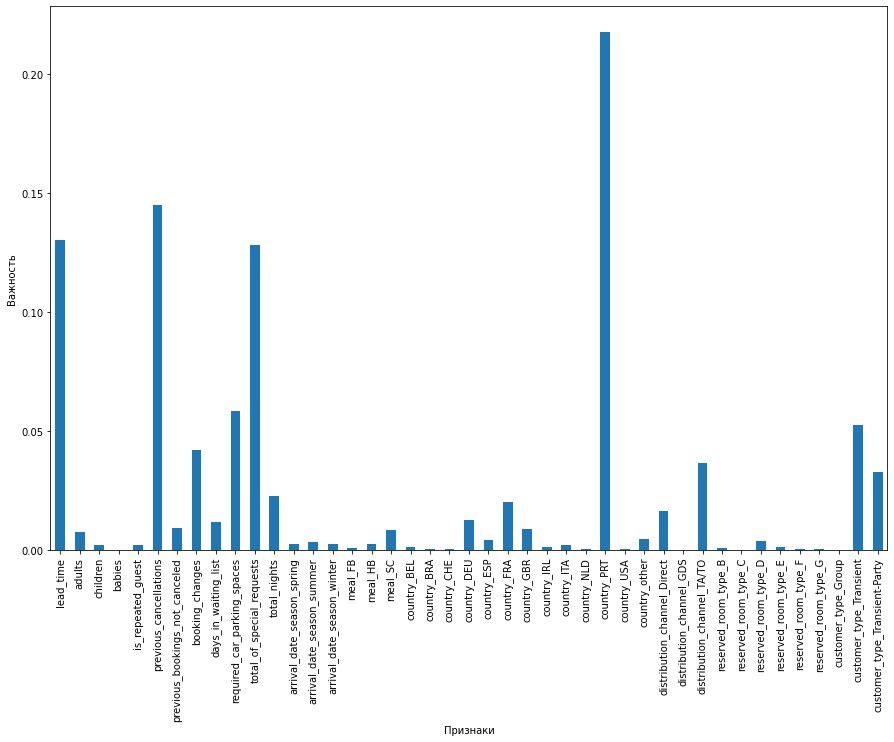

In [112]:
df_test_importance = pd.DataFrame(data=df_test_ohe, columns=df_test_ohe.columns)
df_test_importance['is_canceled'] = df_test_ohe['is_canceled']

best_model.fit(X = df_test_importance.drop(['is_canceled'], axis=1), y = df_test_importance['is_canceled'])

df_test_main = pd.Series(model.feature_importances_, df_test_importance.drop(['is_canceled'], axis=1).columns)
fig, ax = plt.subplots(figsize=(15,10))

df_test_main.plot.bar(ax=ax)
ax.set_xlabel('Признаки')
ax.set_ylabel('Важность')
plt.show()

Стоит выделить четыре важнейших признака:

1. country_PRT
2. previous_cancellations
3. lead_time
4. total_of_special_requests

С недобросовестными португальцами мы уже встречались, лучше поближе посмотрим на оставшиеся 3 столбца.

#### previous_cancellations

Основываясь на выводах пункта 2.1.14, можно с уверенностью сказать что лидером в отменах стала Португалия.

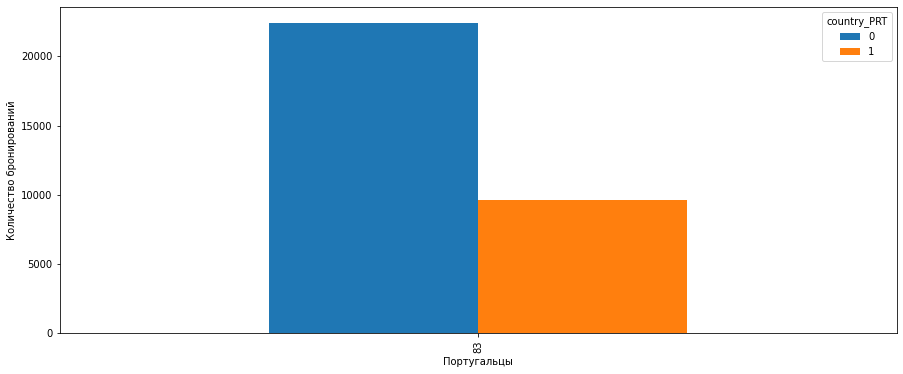

In [113]:
# построим график 
pd.crosstab(df_test_ohe['previous_cancellations'].sum(), df_test_ohe['country_PRT']).plot.bar(figsize=(15, 6))

plt.xlabel('Португальцы')
plt.ylabel('Количество бронирований')

plt.show()

Треть жителей этой страны отменяли бронь несколько раз. Может языковой барьер?

#### lead_time

In [114]:
most_cancellations = 0
cencel_day = 0

for i in df_test_ohe['lead_time'].unique():
    cancellations = df_test_ohe.loc[(df_test_ohe['lead_time'] == i) & (df_test_ohe['is_canceled'] == 1), 'is_canceled'].count()
    
    if cancellations > most_cancellations:
        most_cancellations = cancellations
        cencel_day = i
        
print('Больше всего отмен (',most_cancellations,') происходит на', cencel_day,'день.')

Больше всего отмен ( 177 ) происходит на 56 день.


#### total_of_special_requests

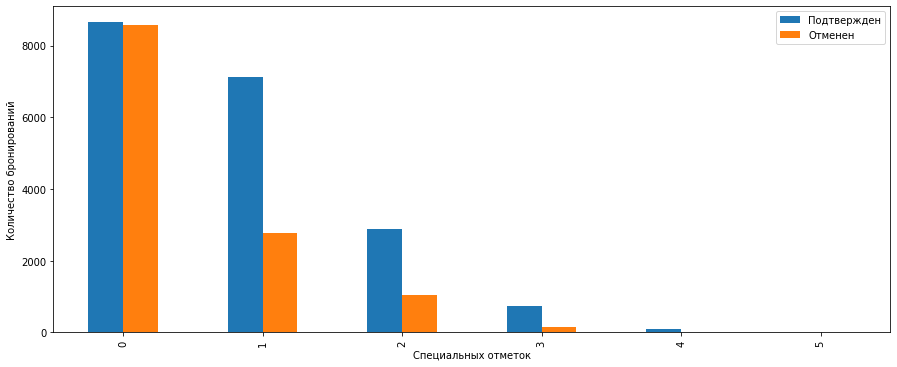

In [115]:
# построим график 
pd.crosstab(df_test_ohe['total_of_special_requests'], df_test_ohe['is_canceled']).plot.bar(figsize=(15, 6))

plt.legend(['Подтвержден', 'Отменен'])
plt.xlabel('Специальных отметок')
plt.ylabel('Количество бронирований')

plt.show()

В пункте 2.1.22 было отмечено, что больше всего отмен с нулевым количеством специалных отметок. 

### Выводы

Основные маркеры, отличающие ненадежного клиента это:

0. ПОРТУГАЛЕЦ!
1. каждый третий представитель этой страны;
2. дата бронирования и датой прибытия почти 2 месяца;
3. без спец требований.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: вполне наглядный получился портрет :) Круто, что знаешь про важность признаков!</div>

## Вывод

### Опишим модель, которая решает задачу с наибольшей выгодой для бизнеса

Среди трех рассмотренных моделей, лучше всех показала себя модель **Дерева решений** с параметрами class_weight='balanced', criterion='entropy',max_depth=49, random_state=1001. Результат на тестовой выборке составил: 

1. точность: 0.6741
2. AUC-ROC: 0.6417
3. F1-мера: 0.5400
4. полнота: 0.4887

Для минимизации убытков наилучшей метрикой бутет **Recall**, т.к. нам необходимо минимизировать ложноотрицательные ответы.

### Дадим бизнесу рекомендации по результатам проделанной работы

При выборе потенциальных постояльцев с которых стоит брать депозитную предоплату необходимо строго следовать следующему скрипту: 
1. Каждый третий португальский паспорт брать в залог;
2. не верить обещаниям, что ровно через два месяца приедут (скорее отменят бронь на 56 день);
3. Если у клиента есть спец требования, значит он действительно намерян заселится.

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый и структурированный проект, спасибо, такие всегда приятно проверять :)

Подробный анализ, наглядные графики, качественная работа с моделями, все супер!

Осталось поправить расчет прибыли до внедрения модели и я смогу принять твою работу

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы! Постараюсь проверить твою работу побыстрее :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Вот теперь то, что нужно!

Все критичные замечания исправлены, и теперь я могу принять твою работу :)

<b>Успехов в обучении!</b>
        
</div>